/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

(10000, 32, 32)
显示原图 1
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_1
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_2
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_3
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_4
(10000, 32, 32)
loading /root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/data_batch_5
(10000, 32, 32)
(10000, 32, 32)
finished loadding CIFAR-10 data
training data shape: (50000, 32, 32)
training labels shape: (50000,)
test data shape: (10000, 32, 32)
test labels shape: (10000,)


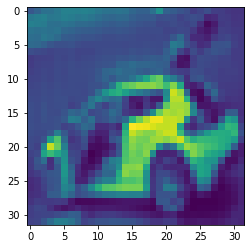

In [1]:
#rnn网络数据预处理
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import random
from time import time
#消除警告的包
import warnings
warnings.filterwarnings("ignore")

# 设置随机种子
random.seed(1)



def load_gray_CIFAR_batch(filename):
    with open(filename,'rb')as f:
        data_dict = pickle.load(f,encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
        
        #把元数据结构调整为：BCWH
        images = images.reshape(10000,3,32,32)
        gray_img = images.mean(1)
        print(gray_img.shape)
        #tesorflow 处理图像数据的结构为：BWHC
        #把通道数据c移动到最后一个维度
#         images = gray_img.transpose(0,2,3,1)
        labels = np.array(labels)
        return gray_img,labels
test_image,test_label = load_gray_CIFAR_batch('/root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/test_batch')
print('显示原图',test_label[6])
plt.imshow(test_image[6])

import os
def load_CIFAR_data(data_dir):
    images_train = []
    labels_train = []


    for i in range(5):
        # 循环读取，每一个文件的数据和标签名
        f = os.path.join(data_dir,'data_batch_%d'%(i+1))
        print('loading',f)
        image_batch,label_batch=load_gray_CIFAR_batch(f)
        images_train.append(image_batch)
        labels_train.append(label_batch)
        Xtrain=np.concatenate(images_train)
        Ytrain=np.concatenate(labels_train)
        del image_batch,label_batch
    Xtest,Ytest = load_gray_CIFAR_batch(os.path.join(data_dir,'test_batch'))
    print("finished loadding CIFAR-10 data")
    return Xtrain,Ytrain,Xtest,Ytest
data_dir = '/root/.ipython/profile_nbserver/code/cifar10-CNN-master/cifar10_data/cifar-10-batches-py/'

Xtrain,Ytrain,Xtest,Ytest = load_CIFAR_data(data_dir)
print('training data shape:',Xtrain.shape)
print('training labels shape:',Ytrain.shape)
print('test data shape:',Xtest.shape)
print('test labels shape:',Ytest.shape)

2


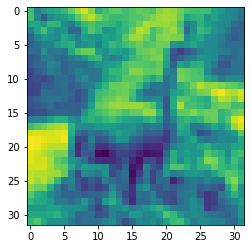

In [2]:
%matplotlib inline
plt.imshow(Xtrain[6])
print(Ytrain[6])

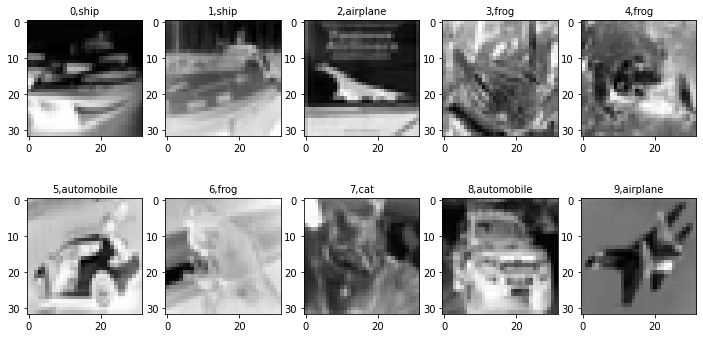

In [3]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
#定义显示图像数据以及对应标签的函数
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num > 10:
        num=10
    for i in range(0,num):
        ax=plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title = str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10)
        idx+=1
    plt.show()
    
plot_images_labels_prediction(Xtest,Ytest,[],1,10)

In [4]:
Xtrain[0][0][0]
print(Xtrain[0][0][0])
Xtrain_normalize = Xtrain.astype('float32')/255.0
Xtest_normalize = Xtest.astype('float32')/255.0
Xtrain_normalize[0][0][0]
# print(Xtrain_normalize[0][0][0])

61.333333333333336


0.24052288

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
Ytrain_reshape = Ytrain.reshape(-1,1)
Ytrain_onehot = encoder.transform(Ytrain_reshape)
Ytest_reshape = Ytest.reshape(-1,1)
Ytest_onehot = encoder.transform(Ytest_reshape)

In [6]:
# def get_train_batch(number,batch_size):
#     return np.array(Xtrain_normalize[number*batch_size:(number+1)*batch_size]).reshape([-1,1024]),\
# np.array(Ytrain_onehot[number*batch_size:(number+1)*batch_size])
# x_1,y_1 = get_train_batch(1,10)
# print(x_1,y_1)
# print(x_1.shape,y_1.shape)


# x_2  = x_1[0]
# x_2.reshape([-1, 32, 32])
# # print('这是x_2',x_2)
# x_3 = tf.reshape(x_1, [-1, 32, 32])
# # # x_4 = np.reshape()
# with tf.Session() as tess:
#     print(sess.run(x_3))
#     print(x_3.shape)

In [7]:


epoch_list=[]
accuracy_list=[]
loss_list = []

lr = 1e-4
# 每个时刻的输入特征是28维的，就是每个时刻输入一行，一行有 28 个像素
input_size = 32
# 时序持续长度为28，即每做一次预测，需要先输入28行
timestep_size = 32
# 每个隐含层的节点数
hidden_size = 256
# LSTM layer 的层数
layer_num = 1
# 最后输出分类类别数量，如果是回归预测的话应该是 1
class_num = 10

# keep_prob = tf.placeholder(tf.float32, [])
_batch_size = tf.placeholder(tf.int32, [])
# x = tf.placeholder(tf.float32, [None, 784])
x = tf.placeholder('float',shape=[None,32,32],name='x')
y = tf.placeholder(tf.float32, [None, class_num],name='y')
 
##########################################################################搭建LSTM模型
 
# 把784个点的字符信息还原成 28 * 28 的图片
# 下面几个步骤是实现 RNN / LSTM 的关键
####################################################################
# **步骤1：RNN 的输入shape = (batch_size, timestep_size, input_size)
# x = tf.reshape(x, [-1, 32, 32])
 
stacked_rnn = []
for iiLyr in range(layer_num):
    stacked_rnn.append(tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, state_is_tuple=True))
mlstm_cell = tf.nn.rnn_cell.MultiRNNCell(cells=stacked_rnn, state_is_tuple=True)

init_state = mlstm_cell.zero_state(_batch_size, dtype=tf.float32)

# **步骤6：方法一，调用 dynamic_rnn() 来让我们构建好的网络运行起来
# ** 当 time_major==False 时， outputs.shape = [batch_size, timestep_size, hidden_size]
# ** 所以，可以取 h_state = outputs[:, -1, :] 作为最后输出
# ** state.shape = [layer_num, 2, batch_size, hidden_size],
# ** 或者，可以取 h_state = state[-1][1] 作为最后输出
# ** 最后输出维度是 [batch_size, hidden_size]
outputs, state = tf.nn.dynamic_rnn(mlstm_cell, inputs=x, initial_state=init_state, time_major=False)
# outputs, state = tf.nn.dynamic_rnn(mlstm_cell, inputs=x,dtype=tf.float32,time_major=False)

h_state = outputs[:, -1, :] 
# h_state = outputs[:, -1, :]  # 或者 h_state = state[-1][1]
 
# *************** 为了更好的理解 LSTM 工作原理，我们把上面 步骤6 中的函数自己来实现 ***************
# 通过查看文档你会发现， RNNCell 都提供了一个 __call__()函数（见最后附），我们可以用它来展开实现LSTM按时间步迭代。
# **步骤6：方法二，按时间步展开计算
# outputs = list()
# state = init_state
# with tf.variable_scope('RNN'):
#     for timestep in range(timestep_size):
#         if timestep > 0:
#             tf.get_variable_scope().reuse_variables()
#         # 这里的state保存了每一层 LSTM 的状态
#         (cell_output, state) = mlstm_cell(x[:, timestep, : ], state)
# #         (cell_output, state) = mlstm_cell(x[:, timestep, : ])

#         print("我看你作妖到何时",cell_output,state)
#         outputs.append(cell_output)
# h_state = outputs[-1]
 
# 上面 LSTM 部分的输出会是一个 [hidden_size] 的tensor，我们要分类的话，还需要接一个 softmax 层
# 首先定义 softmax 的连接权重矩阵和偏置
# out_W = tf.placeholder(tf.float32, [hidden_size, class_num], name='out_Weights')
# out_bias = tf.placeholder(tf.float32, [class_num], name='out_bias')
# 开始训练和测试
W = tf.Variable(tf.truncated_normal([hidden_size, class_num], stddev=0.1), dtype=tf.float32)
bias = tf.Variable(tf.constant(0.1,shape=[class_num]), dtype=tf.float32)
y_pre = tf.nn.softmax(tf.matmul(h_state, W) + bias)

# def get_train_batch(number,batch_size):
#     return np.array(Xtrain_normalize[number*batch_size:(number+1)*batch_size]),\
# np.array(Ytrain_onehot[number*batch_size:(number+1)*batch_size])
def get_train_batch(number,batch_size):
    return np.array(Xtrain_normalize[number*batch_size:(number+1)*batch_size],dtype=float),\
np.array(Ytrain_onehot[number*batch_size:(number+1)*batch_size])

# 损失和评估函数
cross_entropy = -tf.reduce_mean(y * tf.log(y_pre))
train_op = tf.train.AdamOptimizer(lr).minimize(cross_entropy)
saver = tf.train.Saver()
correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess = tf.Session()
sess.run(tf.global_variables_initializer())

startTime =time()
for i in range(5001):
    batch_size = 8
    batch_x,batch_y = get_train_batch(i,batch_size)

    if (i+1)%100 == 0:
#         train_accuracy = sess.run(accuracy, feed_dict={
#             x:batch_x, y: batch_y, keep_prob: 1.0, batch_size: batch_size})
        loss,train_accuracy = sess.run([cross_entropy,accuracy], feed_dict={
        x:batch_x, y: batch_y,_batch_size:batch_size})
        epoch_list.append(i+1)
        loss_list.append(loss)
        accuracy_list.append(train_accuracy)
        # 已经迭代完成的 epoch 数: mnist.train.epochs_completed
        print("step %d, training accuracy %g" % ((i+1), train_accuracy))

    sess.run(train_op, feed_dict={x: batch_x, y: batch_y,_batch_size: batch_size})
    saver.save(sess,'/root/.ipython/profile_nbserver/cash_file/CIFAR10_1rnn/cifar10_model.ckpt')
duration = time()-startTime
print('train finished takes:',duration)
 
# test_total_batch = int(len(Xtest_normalize)/batch_size)
# test_acc_sum = 0.0
# for i in range(test_total_batch):
#     test_image_batch = Xtest_normalize[i*batch_size:(i+1)*batch_size]
#     test_label_batch = Ytest_onehot[i*batch_size:(i+1)*batch_size]
#     test_batch_acc = sess.run(accuracy,feed_dict= {x:test_image_batch,y:test_label_batch})
#     test_acc_sum += test_batch_acc
# test_acc = float(test_acc_sum/test_total_batch)
# print('test accuracy:{:.6f}'.format(test_acc))



Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
step 100, training accuracy 0.125
step 200, training accuracy 0.375
step 300, training accuracy 0.125
step 400, training accuracy 0.25
step 500, training accuracy 0.25
step 600, training accuracy 0.125
step 700, training accuracy 0.125
step 800, training accuracy 0
step 900, training accuracy 0.625
step 1000, training accuracy 0.375
step 1100, training accuracy 0.375
step 1200, training accuracy 0.5


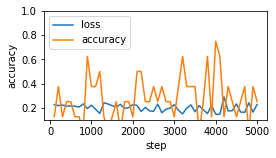

In [8]:
#可视化损失
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.legend(['loss'],loc='upper right')


#可视化准确率
plt.plot(epoch_list,accuracy_list,label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.1,1)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.legend()
plt.show()


In [9]:
print(accuracy_list,loss_list)

[0.125, 0.375, 0.125, 0.25, 0.25, 0.125, 0.125, 0.0, 0.625, 0.375, 0.375, 0.5, 0.125, 0.0, 0.125, 0.25, 0.0, 0.25, 0.25, 0.125, 0.5, 0.5, 0.25, 0.25, 0.375, 0.25, 0.375, 0.25, 0.25, 0.125, 0.375, 0.625, 0.375, 0.375, 0.375, 0.0, 0.25, 0.625, 0.125, 0.75, 0.625, 0.125, 0.375, 0.25, 0.125, 0.25, 0.375, 0.0, 0.375, 0.25] [0.22534642, 0.21777442, 0.22177319, 0.21359405, 0.21402493, 0.2128183, 0.20501447, 0.23196585, 0.19333826, 0.22046351, 0.18683562, 0.15239921, 0.24143033, 0.23111148, 0.21636048, 0.20710154, 0.22732429, 0.19376948, 0.20074144, 0.22604923, 0.21966998, 0.16797669, 0.20300034, 0.17416798, 0.17034104, 0.2298604, 0.15929264, 0.18828848, 0.19744505, 0.22500591, 0.178031, 0.14890455, 0.19661883, 0.22339018, 0.16685224, 0.21726367, 0.18381208, 0.15150675, 0.2180058, 0.14616069, 0.14532614, 0.28932267, 0.17371318, 0.1753184, 0.23175678, 0.1641802, 0.16127135, 0.24123712, 0.16399094, 0.22681776]


test accuracy:0.330400
[4 8 8 2 4 6 6 4 2 9 3 9 6 9 6 8 6 2 8 7 9 0 4 1 2 6 4 9 1 6 6 2 4 6 9 6 2
 9 9 5 0 4 3 4 8 9 6 6 4 4]


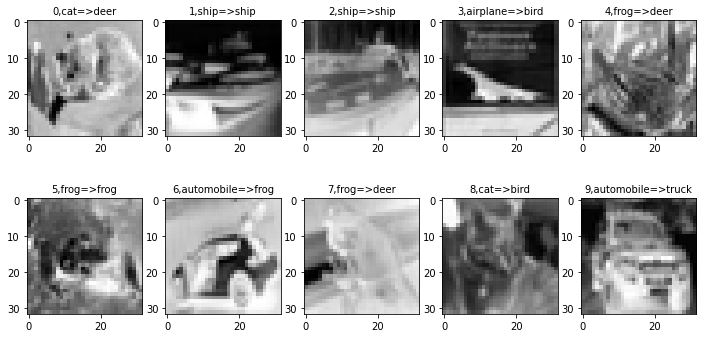

In [10]:
batch_size = 50
test_total_batch = int(len(Xtest_normalize)/batch_size)
test_acc_sum = 0.0
for i in range(test_total_batch):
    test_image_batch = Xtest_normalize[i*batch_size:(i+1)*batch_size]
    test_label_batch = Ytest_onehot[i*batch_size:(i+1)*batch_size]
    test_batch_acc = sess.run(accuracy,feed_dict= {x:test_image_batch,y:test_label_batch,_batch_size: batch_size})
    test_acc_sum += test_batch_acc
test_acc = float(test_acc_sum/test_total_batch)
print('test accuracy:{:.6f}'.format(test_acc))


test_pred = sess.run(y_pre,feed_dict={x:Xtest_normalize[:50],_batch_size: batch_size})
prediction_result =sess.run(tf.argmax(test_pred,1))
print(prediction_result)


plot_images_labels_prediction(Xtest,Ytest,prediction_result,0,50)


In [11]:

def predict(sess,inputs):
#     preds = sess.run('pred:0', feed_dict={'X:0': inputs}) 
    test_pred = sess.run(y_pre,feed_dict={x:inputs[:10],_batch_size: 10})
    #部署clipper时用这种写法
#     test_pred = sess.run('pred:0',feed_dict={'x:0':inputs[:50]})

    prediction_result =sess.run(tf.argmax(test_pred,1))
    # `X` is used, it must be defined in the model with that name explicitly!
    return prediction_result
predict(sess,Xtest_normalize)

array([4, 8, 8, 2, 4, 6, 6, 4, 2, 9])

数据类型为啥不对啊  源代码 运行的是  [[1.1,2.0]]转换成array([[1.1,2.0]], dtype=float32)类的数据类型 但我无论怎么转换都只能得到 [[1.1,2.0]]形式的数据类型  为什么 啊啊啊啊啊？？
[[1.1,2.0]]转换成array([[1.1,2.0]], dtype=float32)

卡了我两天 定义的 常规变量 不要和tensor变量重名 batch_size 和整形 batch_size 重名了  运行初始化 定义时 运行的是 plachholer   


有这个问题 不知道怎么解决
https://blog.csdn.net/junjie20082008/article/details/85762266

批次最多设计为10 训练5000次会梯度爆炸